<a href="https://colab.research.google.com/github/firaolkiya/solar-challenge-week1/blob/eda-sierraleone/notebooks/sierraleone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing dependencies

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

view top 10 data

In [130]:
ds =pd.read_csv("/content/sierraleone-bumbuna.csv")
ds.head(10)

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-30 00:01 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.1  0.0     0.0   
1  2021-10-30 00:02 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2  2021-10-30 00:03 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
3  2021-10-30 00:04 -0.7  0.0 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
4  2021-10-30 00:05 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
5  2021-10-30 00:06 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
6  2021-10-30 00:07 -0.7  0.0 -0.8   0.0   0.0  22.0  99.4  0.1     0.7   
7  2021-10-30 00:08 -0.7  0.0 -0.8   0.0   0.0  22.0  99.5  0.2     0.7   
8  2021-10-30 00:09 -0.7 -0.1 -0.8   0.0   0.0  22.0  99.5  0.7     1.1   
9  2021-10-30 00:10 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.6     1.1   

   WSstdev     WD  WDstdev    BP  Cleaning  Precipitation  TModA  TModB  \
0      0.0    0.0      0.0  1002         0            0.0   22.3   22.6   
1      0.0    0.0      0.0  1002         0            0.0   22.3   22.6   
2      0.0    0.0      0.0  1002         0            0.0   22.3   22.6   
3      0.0    0.0      0.0  1002         0            0.1   22.3   22.6   
4      0.0    0.0      0.0  1002         0            0.0   22.3   22.6   
5      0.0    0.0      0.0  1002         0            0.0   22.3   22.7   
6      0.2  240.4      0.0  1002         0            0.0   22.3   22.7   
7      0.4  233.5      1.6  1002         0            0.0   22.4   22.7   
8      0.5  232.0      0.3  1002         0            0.0   22.4   22.7   
9      0.5  232.5      0.3  1002         0            0.0   22.4   22.7   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN

check dimension of dataset

In [124]:
ds.shape

(525600, 19)

Summary Statistics & Missing-Value Report

In [142]:
print("Summary Statistics:")
ds.describe()


Summary Statistics:


GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000000   
25%         0.000000      23.100000      68.700000       0.000000   
50%         3.400000      25.300000      85.400000       0.800000   
75%       345.400000      29.400000      96.700000       2.000000   
max      1473.000000      39.900000     100.000000      19.200000   

              WSgust        WSstdev             WD        WDstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        1.691606       0.363823     133.044668       7.172220   
std         1.617053       0.295000     114.284792       7.535093   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         1.600000       0.400000     161.500000       6.200000   
75%         2.600000       0.600000     234.100000      12.000000   
max        23.900000       4.100000     360.000000      98.400000   

                  BP       Cleaning  Precipitation          TModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      999.876469       0.000967       0.004806      32.504263   
std         2.104419       0.031074       0.047556      12.434899   
min       993.000000       0.000000       0.000000      10.700000   
25%       999.000000       0.000000       0.000000      23.500000   
50%      1000.000000       0.000000       0.000000      26.600000   
75%      1001.000000       0.000000       0.000000      40.900000   
max      1006.000000       1.000000       2.400000      72.800000   

               TModB  
count  525600.000000  
mean       32.593091  
std        12.009161  
min        11.100000  
25%        23.800000  
50%        26.900000  
75%        41.300000  
max        70.400000

In [144]:
print("\n\n describe each columns")
ds.describe(include='all')



 describe each columns


Timestamp            GHI            DNI            DHI  \
count             525600  525600.000000  525600.000000  525600.000000   
unique            525600            NaN            NaN            NaN   
top     2022-10-29 23:44            NaN            NaN            NaN   
freq                   1            NaN            NaN            NaN   
mean                 NaN     201.957515     116.376337     113.720571   
std                  NaN     298.495150     218.652659     158.946032   
min                  NaN     -19.500000      -7.800000     -17.900000   
25%                  NaN      -2.800000      -0.300000      -3.800000   
50%                  NaN       0.300000      -0.100000      -0.100000   
75%                  NaN     362.400000     107.000000     224.700000   
max                  NaN    1499.000000     946.000000     892.000000   

                 ModA           ModB           Tamb             RH  \
count   525600.000000  525600.000000  525600.000000  525600.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean       206.643095     198.114691      26.319394      79.448857   
std        300.896893     288.889073       4.398605      20.520775   
min          0.000000       0.000000      12.300000       9.900000   
25%          0.000000       0.000000      23.100000      68.700000   
50%          3.600000       3.400000      25.300000      85.400000   
75%        359.500000     345.400000      29.400000      96.700000   
max       1507.000000    1473.000000      39.900000     100.000000   

                   WS         WSgust        WSstdev             WD  \
count   525600.000000  525600.000000  525600.000000  525600.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean         1.146113       1.691606       0.363823     133.044668   
std          1.239248       1.617053       0.295000     114.284792   
min          0.000000       0.000000       0.000000       0.000000   
25%          0.000000       0.000000       0.000000       0.000000   
50%          0.800000       1.600000       0.400000     161.500000   
75%          2.000000       2.600000       0.600000     234.100000   
max         19.200000      23.900000       4.100000     360.000000   

              WDstdev             BP       Cleaning  Precipitation  \
count   525600.000000  525600.000000  525600.000000  525600.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean         7.172220     999.876469       0.000967       0.004806   
std          7.535093       2.104419       0.031074       0.047556   
min          0.000000     993.000000       0.000000       0.000000   
25%          0.000000     999.000000       0.000000       0.000000   
50%          6.200000    1000.000000       0.000000       0.000000   
75%         12.000000    1001.000000       0.000000       0.000000   
max         98.400000    1006.000000       1.000000       2.400000   

                TModA          TModB  
count   525600.000000  525600.000000  
unique            NaN            NaN  
top               NaN            NaN  
freq              NaN            NaN  
mean        32.504263      32.593091  
std         12.434899      12.009161  
min         10.700000      11.100000  
25%         23.500000      23.800000  
50%         26.600000      26.900000  
75%         40.900000      41.300000  
max         72.800000      70.400000

In [131]:
print("\nMissing Value Report:")
missing_values = ds.isna().sum()
print(missing_values)

total_rows = ds.shape[0]
print("\nColumns with >5% nulls:")
for column, count in missing_values.items():
  if count / total_rows > 0.05:
    print(f"- {column}: {count} ({count / total_rows:.2%})")


Missing Value Report:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Columns with >5% nulls:
- Comments: 525600 (100.00%)


In [132]:
ds.dropna(inplace=True,axis=1)
ds.shape

(525600, 18)

check for an overview of dataset and missing values

In [133]:
def overview(ds):
  print("overview of dataset")
  print(ds.info())
  print("----------------------------------")
  print("total missing values in each column")
  print(ds.isna().sum())

print("data set before dropping columns")
overview(ds)


data set before dropping columns
overview of dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600

**Incorrect Entries (Negative Values)**

In [146]:
# Select numerical columns to check for negative values
numerical_cols = ds.select_dtypes(include=np.number).columns

# Check for negative values in numerical columns
for col in numerical_cols:
    negative_values = ds[ds[col] < 0]
    if not negative_values.empty:
        print(f"Negative values found in column '{col}':")
        print(negative_values)
        print("\n")


ds[numerical_cols] = ds[numerical_cols].mask(ds[numerical_cols] < 0, 0)


Negative values found in column 'GHI':
               Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb     RH   WS  WSgust  \
0       2021-10-30 00:01 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.1  0.0     0.0   
1       2021-10-30 00:02 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.2  0.0     0.0   
2       2021-10-30 00:03 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.2  0.0     0.0   
3       2021-10-30 00:04 -0.7  0.0 -0.8   0.0   0.0  21.9   99.3  0.0     0.0   
4       2021-10-30 00:05 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.3  0.0     0.0   
...                  ...  ...  ...  ...   ...   ...   ...    ...  ...     ...   
525595  2022-10-29 23:56 -1.6 -0.1 -2.9   0.0   0.0  24.0  100.0  0.0     0.0   
525596  2022-10-29 23:57 -1.7 -0.1 -3.0   0.0   0.0  24.0  100.0  0.0     0.0   
525597  2022-10-29 23:58 -1.7 -0.1 -3.1   0.0   0.0  24.0  100.0  0.0     0.0   
525598  2022-10-29 23:59 -1.7 -0.2 -3.3   0.0   0.0  23.9  100.0  0.0     0.0   
525599  2022-10-30 00:00 -1.7 -0.1 -3.4   0.0   0.0  23.9  100.0  0.0 

In [117]:
print("total missing values in each column")
ds.isna()


total missing values in each column


Timestamp    GHI    DNI    DHI   ModA   ModB   Tamb     RH     WS  \
0           False  False  False  False  False  False  False  False  False   
1           False  False  False  False  False  False  False  False  False   
2           False  False  False  False  False  False  False  False  False   
3           False  False  False  False  False  False  False  False  False   
4           False  False  False  False  False  False  False  False  False   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
525595      False  False  False  False  False  False  False  False  False   
525596      False  False  False  False  False  False  False  False  False   
525597      False  False  False  False  False  False  False  False  False   
525598      False  False  False  False  False  False  False  False  False   
525599      False  False  False  False  False  False  False  False  False   

        WSgust  WSstdev     WD  WDstdev     BP  Cleaning  Precipitation  \
0        False    False  False    False  False     False          False   
1        False    False  False    False  False     False          False   
2        False    False  False    False  False     False          False   
3        False    False  False    False  False     False          False   
4        False    False  False    False  False     False          False   
...        ...      ...    ...      ...    ...       ...            ...   
525595   False    False  False    False  False     False          False   
525596   False    False  False    False  False     False          False   
525597   False    False  False    False  False     False          False   
525598   False    False  False    False  False     False          False   
525599   False    False  False    False  False     False          False   

        TModA  TModB  
0       False  False  
1       False  False  
2       False  False  
3       False  False  
4       False  False  
...       ...    ...  
525595  False  False  
525596  False  False  
525597  False  False  
525598  False  False  
525599  False  False  

[525600 rows x 18 columns]

GET NUMERIC DATA

In [147]:
numeric_df = ds.select_dtypes(include=['number'])
numeric_df.head(10)

GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  WSstdev     WD  \
0  0.0  0.0  0.0   0.0   0.0  21.9  99.1  0.0     0.0      0.0    0.0   
1  0.0  0.0  0.0   0.0   0.0  21.9  99.2  0.0     0.0      0.0    0.0   
2  0.0  0.0  0.0   0.0   0.0  21.9  99.2  0.0     0.0      0.0    0.0   
3  0.0  0.0  0.0   0.0   0.0  21.9  99.3  0.0     0.0      0.0    0.0   
4  0.0  0.0  0.0   0.0   0.0  21.9  99.3  0.0     0.0      0.0    0.0   
5  0.0  0.0  0.0   0.0   0.0  21.9  99.3  0.0     0.0      0.0    0.0   
6  0.0  0.0  0.0   0.0   0.0  22.0  99.4  0.1     0.7      0.2  240.4   
7  0.0  0.0  0.0   0.0   0.0  22.0  99.5  0.2     0.7      0.4  233.5   
8  0.0  0.0  0.0   0.0   0.0  22.0  99.5  0.7     1.1      0.5  232.0   
9  0.0  0.0  0.0   0.0   0.0  21.9  99.2  0.6     1.1      0.5  232.5   

   WDstdev    BP  Cleaning  Precipitation  TModA  TModB  
0      0.0  1002         0            0.0   22.3   22.6  
1      0.0  1002         0            0.0   22.3   22.6  
2      0.0  1002         0            0.0   22.3   22.6  
3      0.0  1002         0            0.1   22.3   22.6  
4      0.0  1002         0            0.0   22.3   22.6  
5      0.0  1002         0            0.0   22.3   22.7  
6      0.0  1002         0            0.0   22.3   22.7  
7      1.6  1002         0            0.0   22.4   22.7  
8      0.3  1002         0            0.0   22.4   22.7  
9      0.3  1002         0            0.0   22.4   22.7

OUTLIER DETECTION

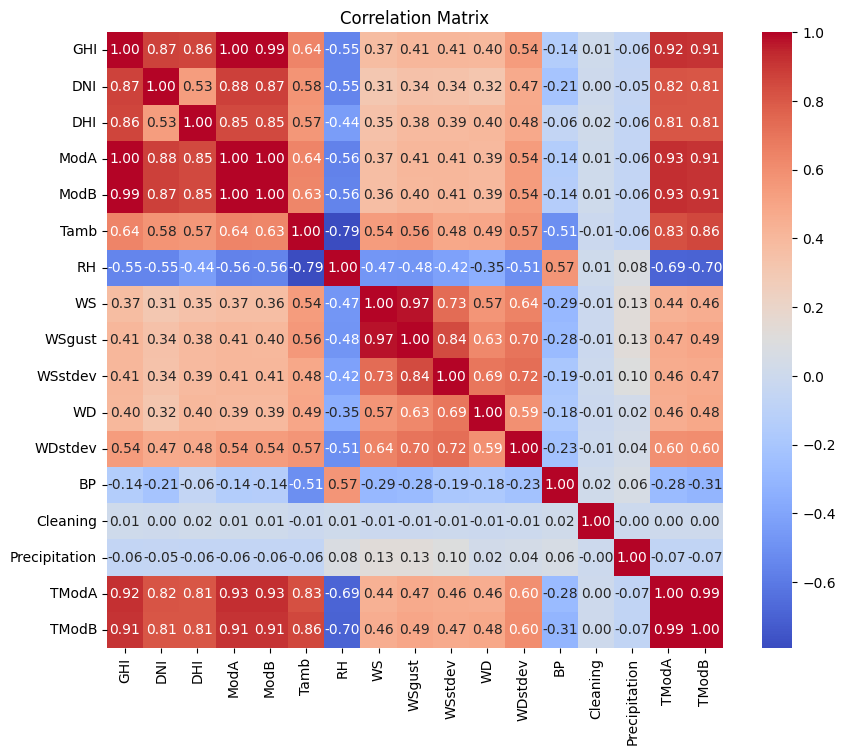

In [148]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
plt.show()

CALCULATE Z SCORE

In [149]:

# Function to detect outliers using Z-score
def detect_outliers_zscore(df, column, threshold=3):
    z_scores = np.abs(stats.zscore(df[column]))
    outliers = df[z_scores > threshold]
    return outliers

# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Columns to check for missing values, outliers, and incorrect entries
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

print("\nChecking for missing values, outliers, and incorrect entries in specified columns:")

for col in columns_to_check:
    if col in ds.columns:
        print(f"\n--- Checking column: {col} ---")

        # Check for missing values
        missing_count = ds[col].isna().sum()
        print(f"Missing values: {missing_count}")

        if ds[col].dtype in ['int64', 'float64']:
            negative_count = (ds[col] < 0).sum()
            if negative_count > 0:
                print(f"Potential incorrect entries (negative values): {negative_count}")

            if ds[col].nunique() > 1: # Only perform outlier detection if there's more than one unique value
                outliers_iqr = detect_outliers_iqr(ds, col)
                print(f"Outliers detected using IQR: {len(outliers_iqr)}")
                if len(outliers_iqr) > 0:
                    print("Examples of detected outliers (IQR):")
                    print(outliers_iqr[col].head())

        else:
            print(f"Skipping outlier/incorrect entry check for {col} as it's not a numeric type.")
    else:
        print(f"\nColumn '{col}' not found in the dataset.")


Checking for missing values, outliers, and incorrect entries in specified columns:

--- Checking column: GHI ---
Missing values: 0
Outliers detected using IQR: 16684
Examples of detected outliers (IQR):
658     932.0
659     995.0
660     988.0
661     978.0
662    1071.0
Name: GHI, dtype: float64

--- Checking column: DNI ---
Missing values: 0
Outliers detected using IQR: 101770
Examples of detected outliers (IQR):
655    285.0
658    397.7
659    492.6
660    504.2
661    506.0
Name: DNI, dtype: float64

--- Checking column: DHI ---
Missing values: 0
Outliers detected using IQR: 4842
Examples of detected outliers (IQR):
651    569.6
652    584.1
653    594.3
654    599.6
655    605.9
Name: DHI, dtype: float64

--- Checking column: ModA ---
Missing values: 0
Outliers detected using IQR: 21017
Examples of detected outliers (IQR):
655     912.0
658    1002.0
659    1065.0
660    1050.0
661    1049.0
Name: ModA, dtype: float64

--- Checking column: ModB ---
Missing values: 0
Outliers de

Compute Z-scores for GHI, DNI, DHI, ModA, ModB, WS, WSgust; flag

In [150]:
# Drop rows with missing values in the specified columns
ds_cleaned = ds.dropna(subset=columns_to_check).copy()

print("\nDataset after dropping rows with missing values in key columns:")
overview(ds_cleaned)

# Compute Z-scores for the specified columns
zscore_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

for col in zscore_cols:
  if col in ds_cleaned.columns and ds_cleaned[col].nunique() > 1: # Ensure column exists and has variance
    # Handle potential division by zero if standard deviation is 0
    std_dev = ds_cleaned[col].std()
    if std_dev == 0:
        ds_cleaned[f'{col}_ZScore'] = 0 # Assign Z-score of 0 if no variance
    else:
        ds_cleaned[f'{col}_ZScore'] = stats.zscore(ds_cleaned[col])
  else:
    print(f"Skipping Z-score calculation for {col} as it's not in the dataset or has no variance.")


# Flag rows with |Z| > 3 in any of the computed Z-score columns
zscore_columns = [f'{col}_ZScore' for col in zscore_cols if f'{col}_ZScore' in ds_cleaned.columns]

if zscore_columns:
    ds_cleaned['Outlier_Flag'] = (ds_cleaned[zscore_columns].abs() > 3).any(axis=1)
else:
    ds_cleaned['Outlier_Flag'] = False # No Z-score columns to flag

print("\nDataset with Z-scores and Outlier Flag:")
print(ds_cleaned[['GHI', 'GHI_ZScore', 'DNI', 'DNI_ZScore', 'DHI', 'DHI_ZScore', 'ModA', 'ModA_ZScore', 'ModB', 'ModB_ZScore', 'WS', 'WS_ZScore', 'WSgust', 'WSgust_ZScore', 'Outlier_Flag']].head())

print("\nRows flagged as potential outliers (based on |Z| > 3):")
print(ds_cleaned[ds_cleaned['Outlier_Flag']].head())


Dataset after dropping rows with missing values in key columns:
overview of dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  fl

In [139]:
import os

# Create the directory if it doesn't exist
output_dir = 'data'
os.makedirs(output_dir, exist_ok=True)

# Define the output file path
output_file = os.path.join(output_dir, 'sierraleone.csv')

# Export the cleaned DataFrame to CSV
ds_cleaned.to_csv(output_file, index=False)

print(f"\nCleaned DataFrame exported to {output_file}")


Cleaned DataFrame exported to data/sierraleone.csv


Time Series Analysis

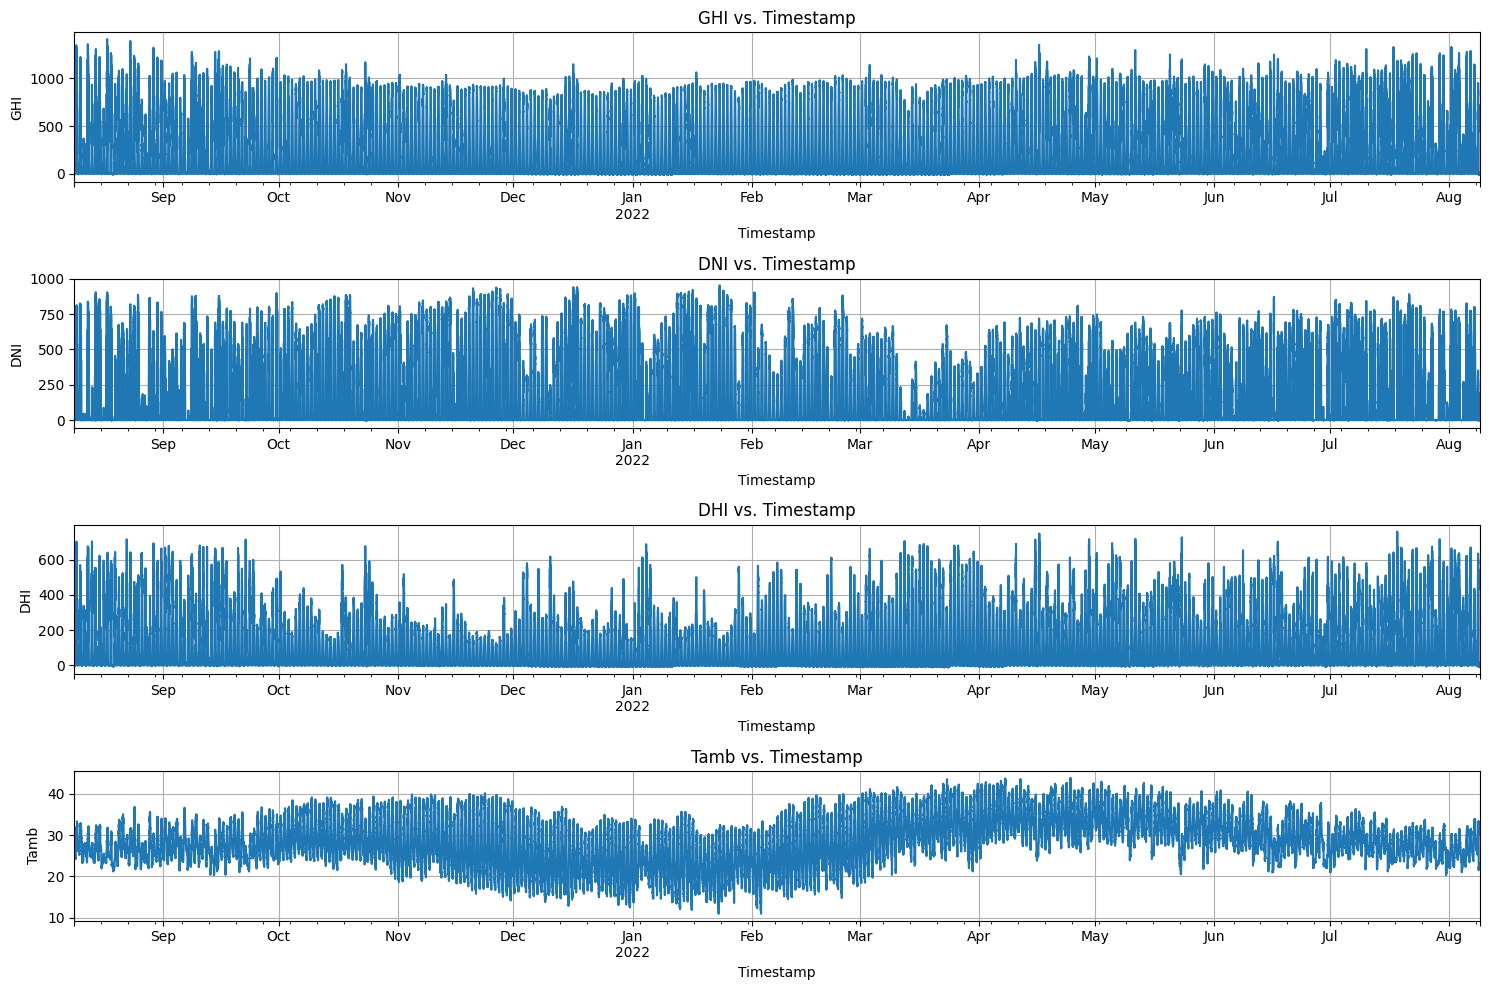

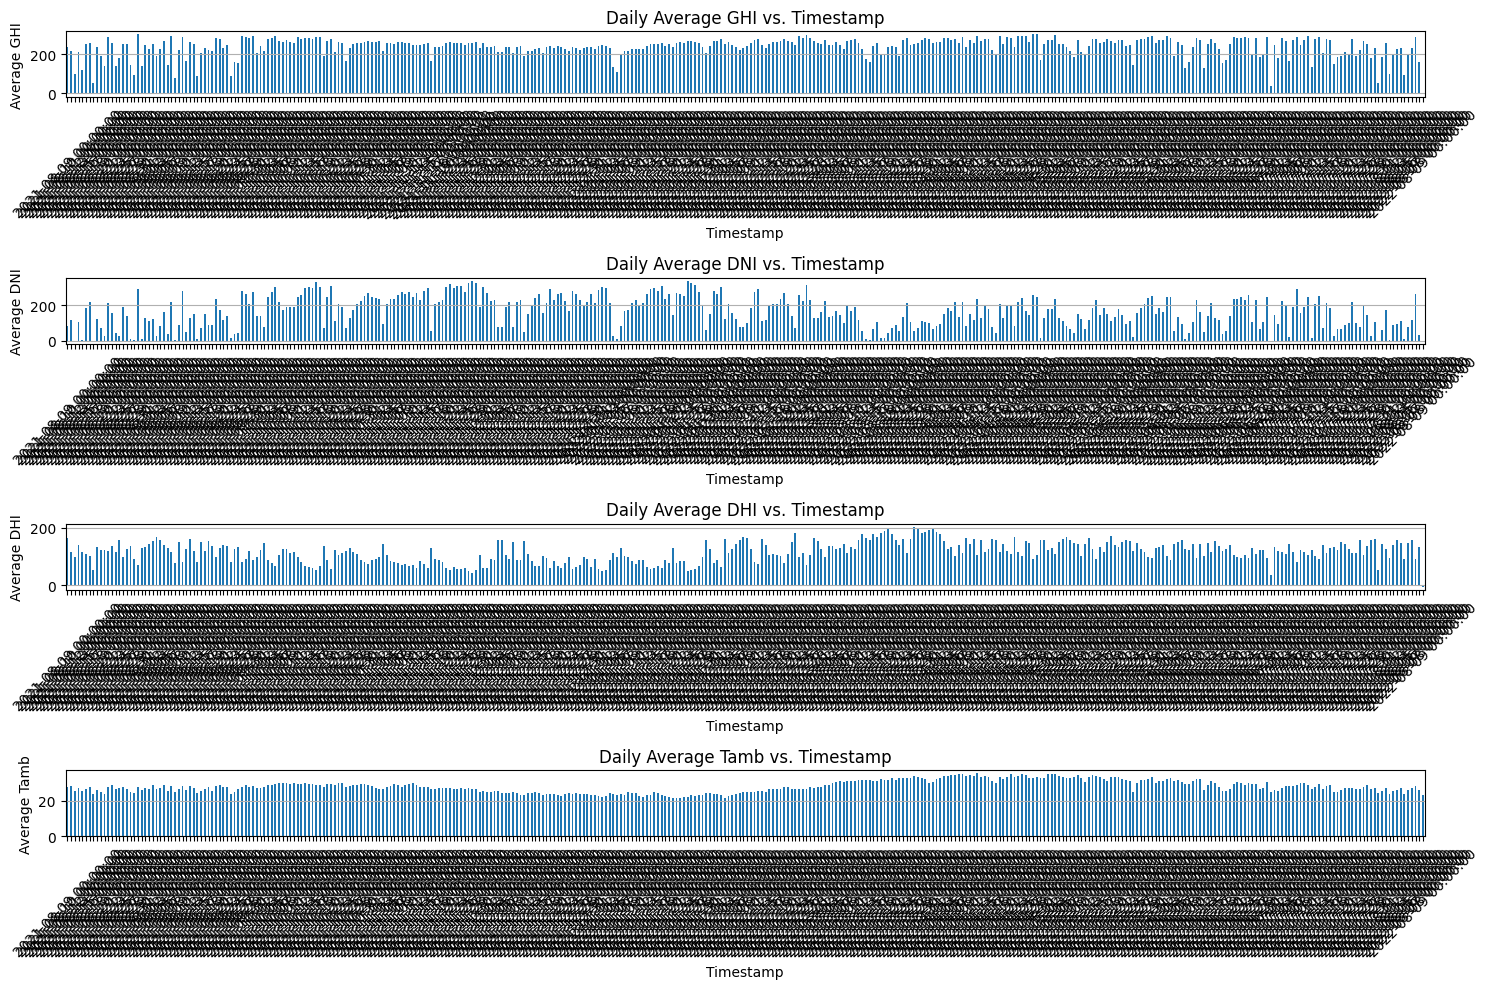

In [151]:


# Define the columns to plot
time_series_cols = ['GHI', 'DNI', 'DHI', 'Tamb']

# Create line plots
plt.figure(figsize=(15, 10))

for i, col in enumerate(time_series_cols):
    plt.subplot(len(time_series_cols), 1, i + 1)
    ds_time_indexed[col].plot(kind='line')
    plt.title(f'{col} vs. Timestamp')
    plt.ylabel(col)
    plt.xlabel('Timestamp')
    plt.grid(True)

plt.tight_layout()
plt.show()

# For demonstration, let's resample to daily averages for a clearer bar chart view
ds_daily = ds_time_indexed[time_series_cols].resample('D').mean()

plt.figure(figsize=(15, 10))

for i, col in enumerate(time_series_cols):
    plt.subplot(len(time_series_cols), 1, i + 1)
    ds_daily[col].plot(kind='bar')
    plt.title(f'Daily Average {col} vs. Timestamp')
    plt.ylabel(f'Average {col}')
    plt.xlabel('Timestamp')
    plt.xticks(rotation=45)
    plt.grid(axis='y')

plt.tight_layout()
plt.show()

In [100]:
ds.shape

(525600, 19)

**Cleaning Impact**


Average ModA and ModB pre/post cleaning:
  Cleaning_Flag        ModA        ModB
0    Post-Clean  734.587853  711.754578
1     Pre-Clean  189.482010  181.418592


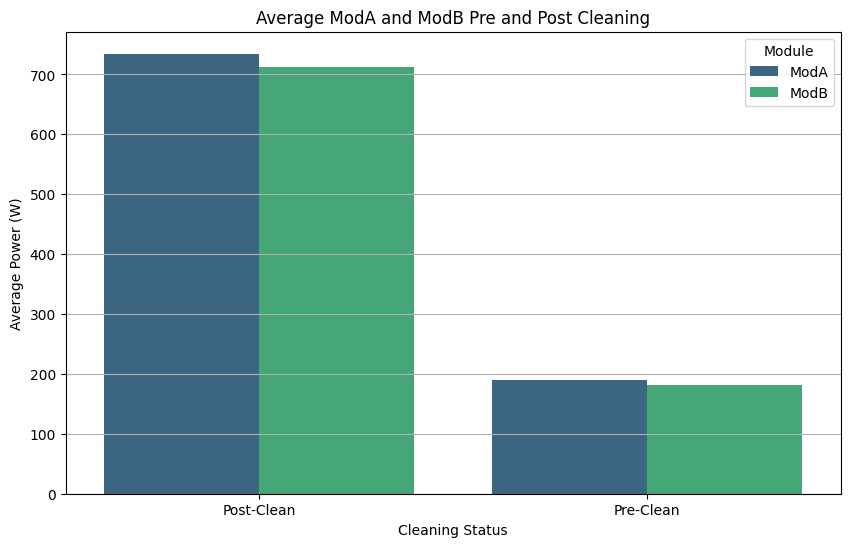

In [152]:

ds_cleaned['Cleaning_Flag'] = ds_cleaned['Outlier_Flag'].apply(lambda x: 'Post-Clean' if x else 'Pre-Clean')

# Group by Cleaning_Flag and calculate the mean of ModA and ModB
mod_comparison = ds_cleaned.groupby('Cleaning_Flag')[['ModA', 'ModB']].mean().reset_index()

print("\nAverage ModA and ModB pre/post cleaning:")
print(mod_comparison)

# Melt the DataFrame for plotting
mod_comparison_melted = mod_comparison.melt(id_vars='Cleaning_Flag', var_name='Module', value_name='Average Power')

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=mod_comparison_melted, x='Cleaning_Flag', y='Average Power', hue='Module', palette='viridis')
plt.title('Average ModA and ModB Pre and Post Cleaning')
plt.ylabel('Average Power (W)')
plt.xlabel('Cleaning Status')
plt.grid(axis='y')
plt.show()

**Correlation & Relationship Analysis**

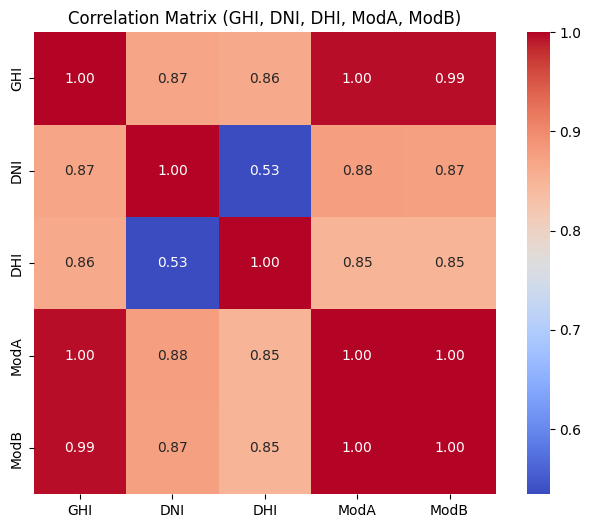

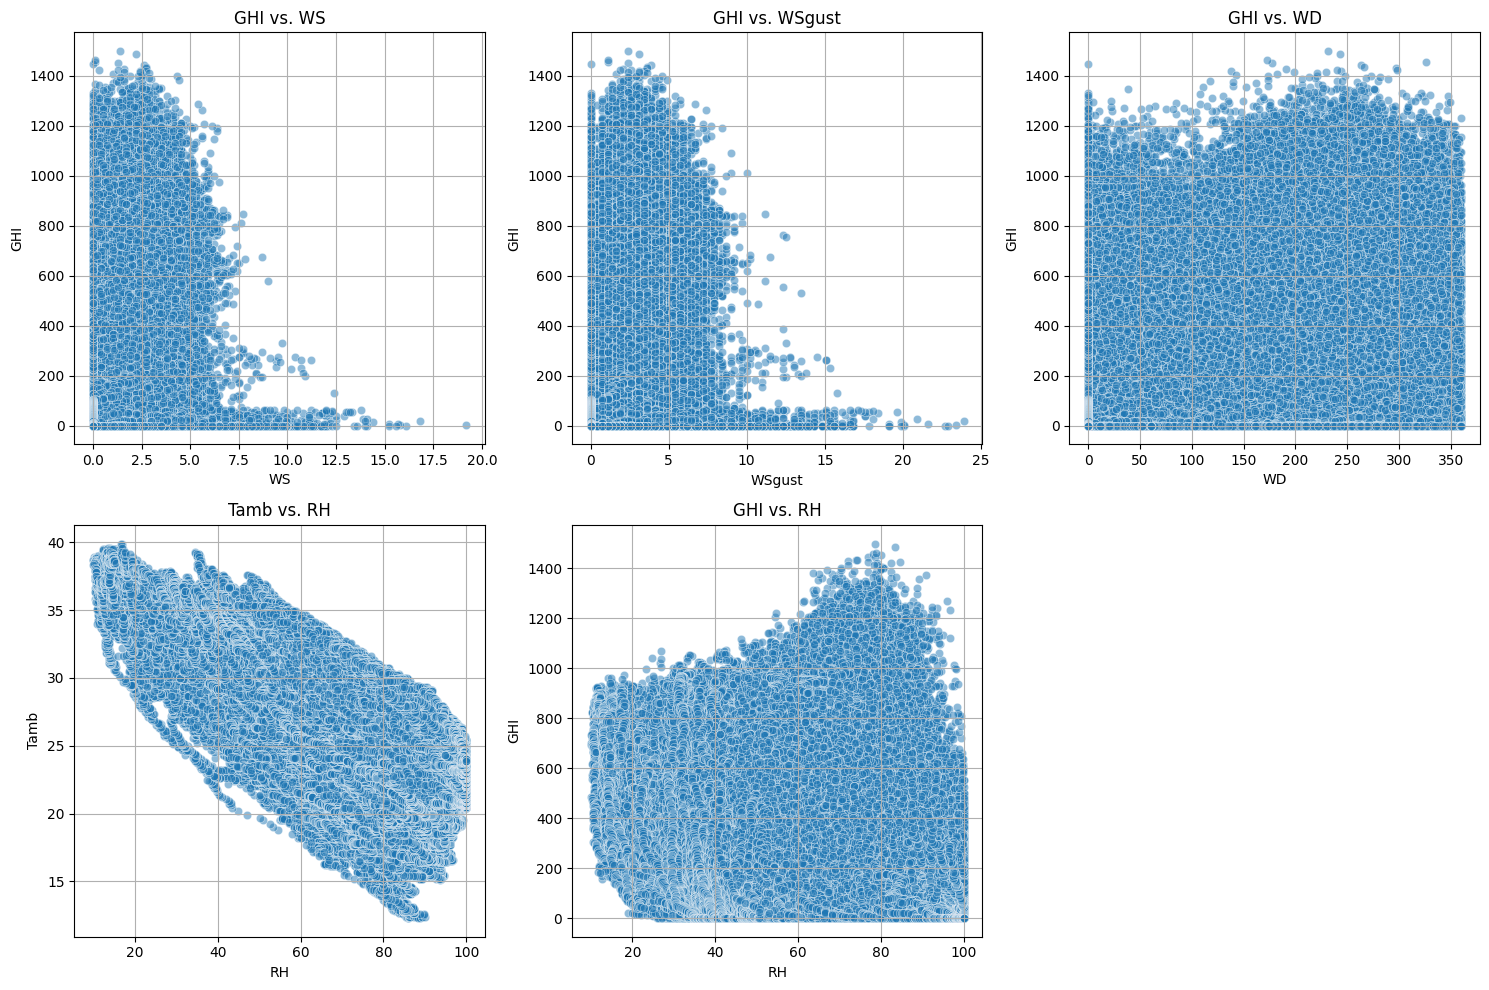

In [153]:

# Heatmap of correlations
correlation_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB']
plt.figure(figsize=(8, 6))
sns.heatmap(ds_cleaned[correlation_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix (GHI, DNI, DHI, ModA, ModB)")
plt.show()

# Scatter plots
scatter_pairs = [
    ('WS', 'GHI'),
    ('WSgust', 'GHI'),
    ('WD', 'GHI'),
    ('RH', 'Tamb'),
    ('RH', 'GHI')
]

plt.figure(figsize=(15, 10))

for i, (x_col, y_col) in enumerate(scatter_pairs):
    if x_col in ds_cleaned.columns and y_col in ds_cleaned.columns:
        plt.subplot(2, 3, i + 1) # Arrange in 2 rows, 3 columns
        sns.scatterplot(data=ds_cleaned, x=x_col, y=y_col, alpha=0.5)
        plt.title(f'{y_col} vs. {x_col}')
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.grid(True)
    else:
        print(f"Skipping scatter plot for {x_col} vs. {y_col} as one or both columns are not in the dataset.")

plt.tight_layout()
plt.show()

**Wind & Distribution Analysis**

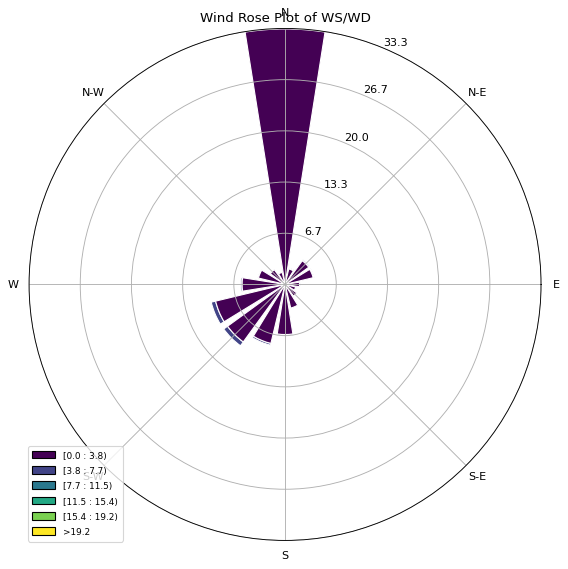

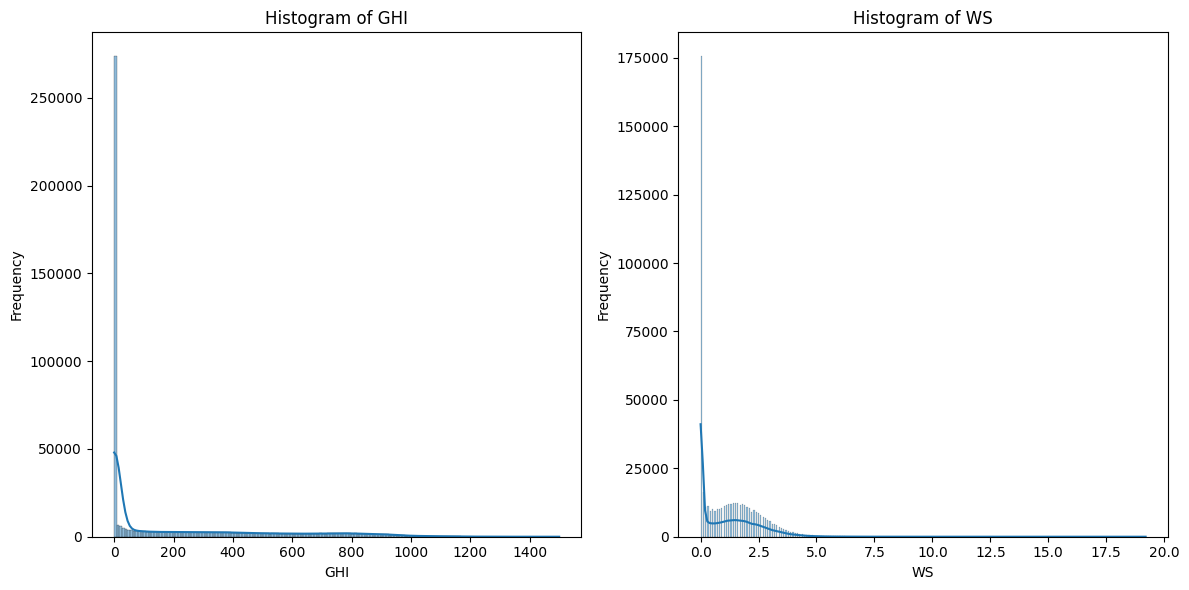

In [154]:

# Check if 'WD' and 'WS' columns exist
if 'WD' in ds_cleaned.columns and 'WS' in ds_cleaned.columns:
  # Requires windrose library: !pip install windrose
  !pip install windrose
  from windrose import WindroseAxes

  # Create a WindroseAxes instance
  ax = WindroseAxes.from_ax()
  # Plot the wind rose
  ax.bar(ds_cleaned['WD'], ds_cleaned['WS'], normed=True, opening=0.8, edgecolor='white')
  # Set the title
  ax.set_title('Wind Rose Plot of WS/WD')
  # Add legend
  ax.set_legend()
  plt.show()
else:
  print("Skipping Wind Rose plot as 'WD' or 'WS' column is not in the dataset.")


# Histograms for GHI and WS
plt.figure(figsize=(12, 6))

# Histogram for GHI
if 'GHI' in ds_cleaned.columns:
  plt.subplot(1, 2, 1)
  sns.histplot(ds_cleaned['GHI'], kde=True)
  plt.title('Histogram of GHI')
  plt.xlabel('GHI')
  plt.ylabel('Frequency')
else:
  print("Skipping GHI histogram as 'GHI' column is not in the dataset.")

# Histogram for WS
if 'WS' in ds_cleaned.columns:
  plt.subplot(1, 2, 2)
  sns.histplot(ds_cleaned['WS'], kde=True)
  plt.title('Histogram of WS')
  plt.xlabel('WS')
  plt.ylabel('Frequency')
else:
  print("Skipping WS histogram as 'WS' column is not in the dataset.")

plt.tight_layout()
plt.show()


**Temperature Analysis**

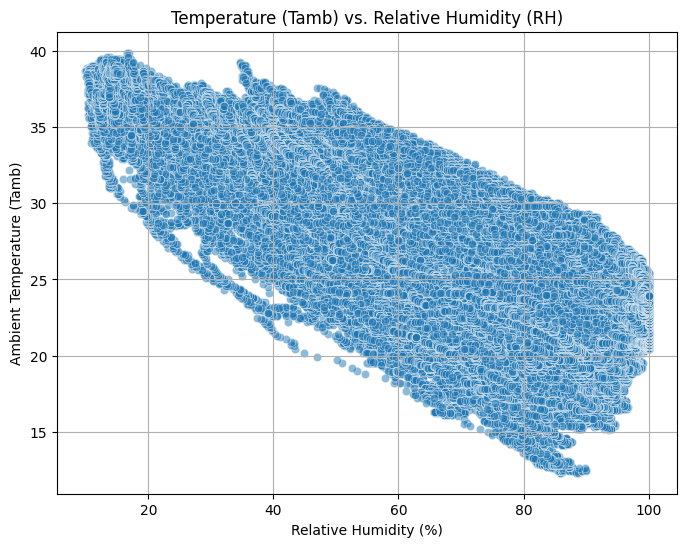

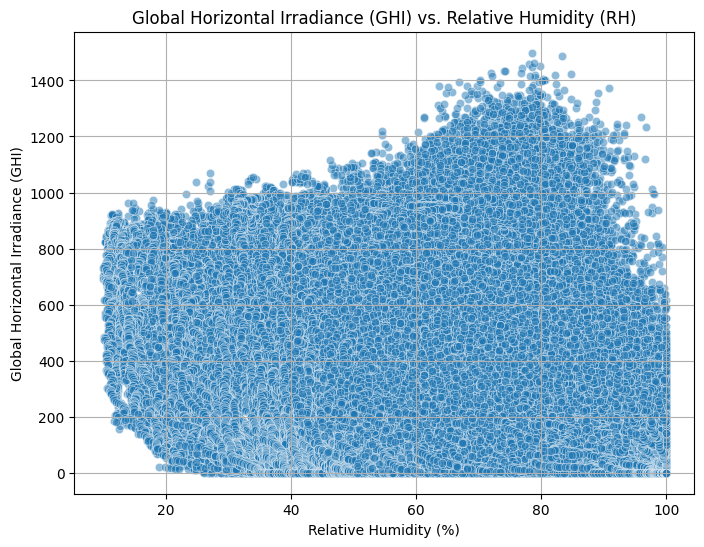

In [155]:
# Scatter plot for Tamb vs. RH
if 'Tamb' in ds_cleaned.columns and 'RH' in ds_cleaned.columns:
  plt.figure(figsize=(8, 6))
  sns.scatterplot(data=ds_cleaned, x='RH', y='Tamb', alpha=0.5)
  plt.title('Temperature (Tamb) vs. Relative Humidity (RH)')
  plt.xlabel('Relative Humidity (%)')
  plt.ylabel('Ambient Temperature (Tamb)')
  plt.grid(True)
  plt.show()
else:
  print("Skipping Temperature vs. RH scatter plot as 'Tamb' or 'RH' column is not in the dataset.")

# Scatter plot for GHI vs. RH
if 'GHI' in ds_cleaned.columns and 'RH' in ds_cleaned.columns:
  plt.figure(figsize=(8, 6))
  sns.scatterplot(data=ds_cleaned, x='RH', y='GHI', alpha=0.5)
  plt.title('Global Horizontal Irradiance (GHI) vs. Relative Humidity (RH)')
  plt.xlabel('Relative Humidity (%)')
  plt.ylabel('Global Horizontal Irradiance (GHI)')
  plt.grid(True)
  plt.show()
else:
  print("Skipping GHI vs. RH scatter plot as 'GHI' or 'RH' column is not in the dataset.")

***Bubble Chart***

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


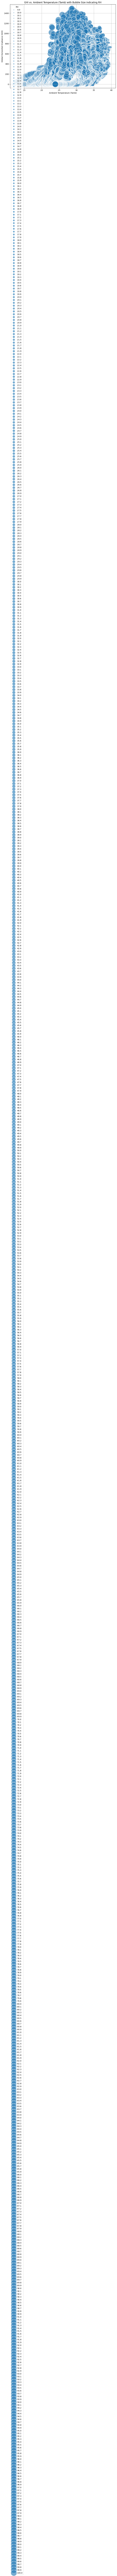

In [156]:
# prompt: GHI vs. Tamb with bubble size = RH or BP.

# Scatter plot with bubble size based on RH or BP
# Let's use RH as the size variable

# Check if required columns exist
if 'GHI' in ds_cleaned.columns and 'Tamb' in ds_cleaned.columns and ('RH' in ds_cleaned.columns or 'BP' in ds_cleaned.columns):

    size_col = 'RH' if 'RH' in ds_cleaned.columns else ('BP' if 'BP' in ds_cleaned.columns else None)

    if size_col:
        plt.figure(figsize=(10, 8))
        sns.scatterplot(data=ds_cleaned, x='Tamb', y='GHI', size=size_col, alpha=0.6, sizes=(20, 1000), legend='full')
        plt.title(f'GHI vs. Ambient Temperature (Tamb) with Bubble Size indicating {size_col}')
        plt.xlabel('Ambient Temperature (Tamb)')
        plt.ylabel('Global Horizontal Irradiance (GHI)')
        plt.grid(True)
        plt.show()
    else:
        print("Skipping bubble plot as neither 'RH' nor 'BP' column is available for bubble size.")

else:
    print("Skipping bubble plot as required columns ('GHI', 'Tamb', and either 'RH' or 'BP') are not in the dataset.")

Visualize columns

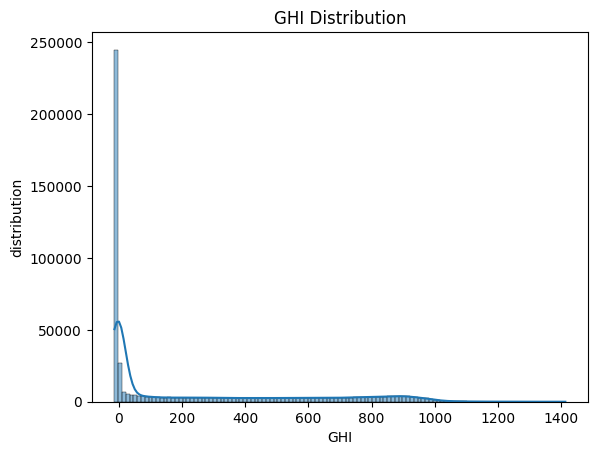

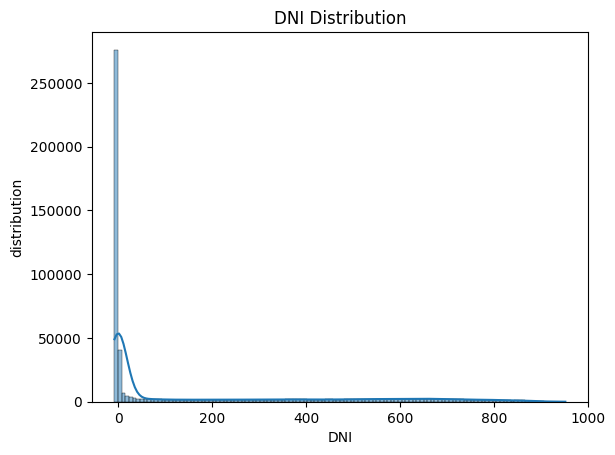

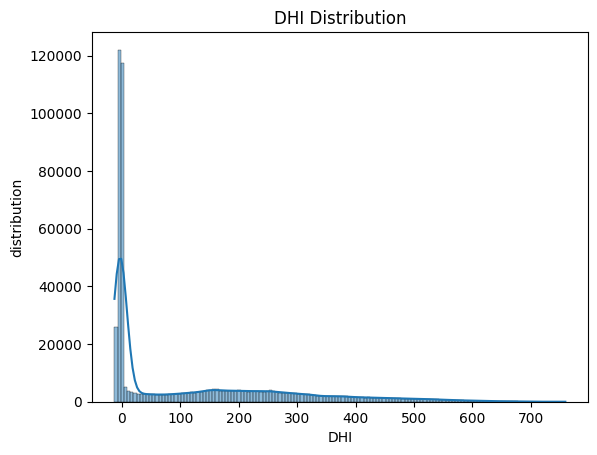

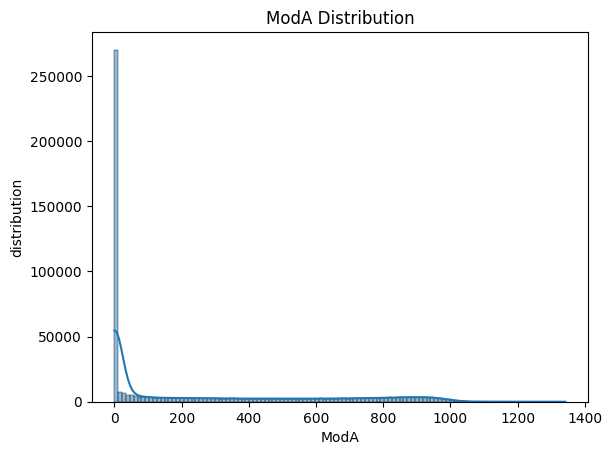

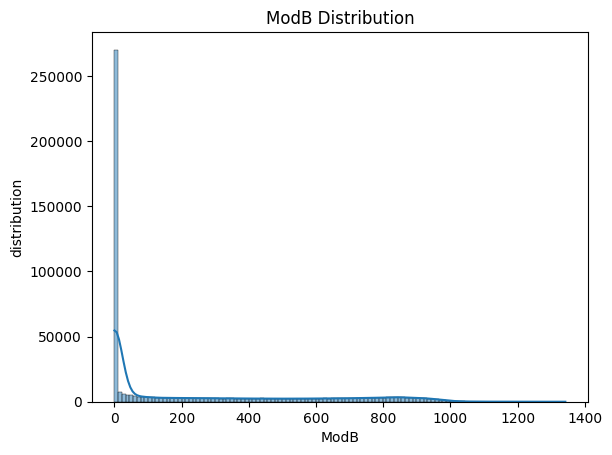

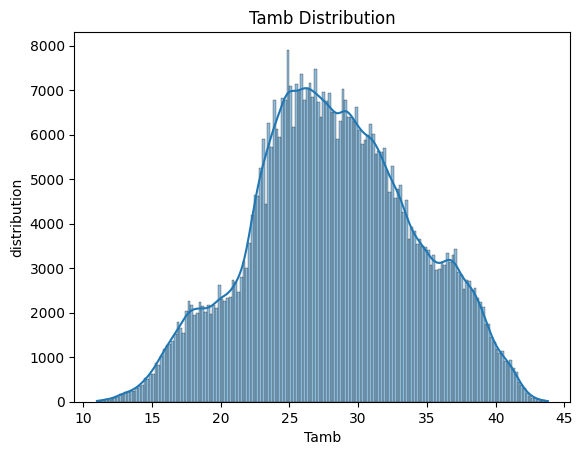

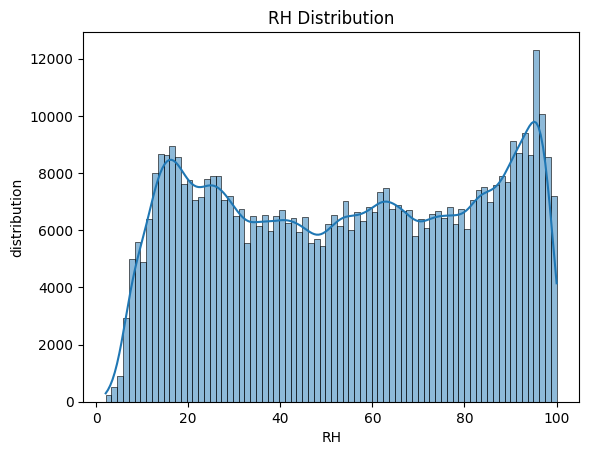

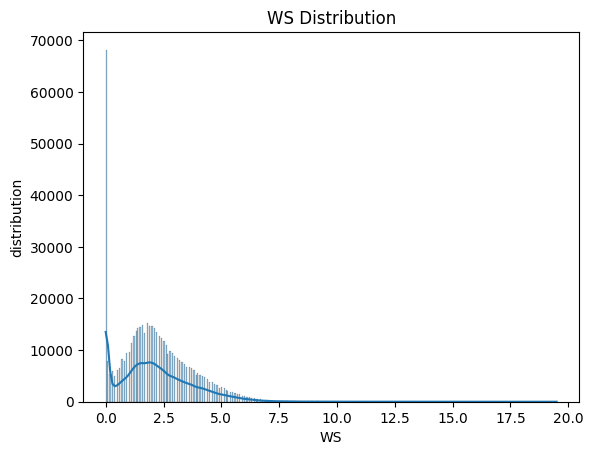

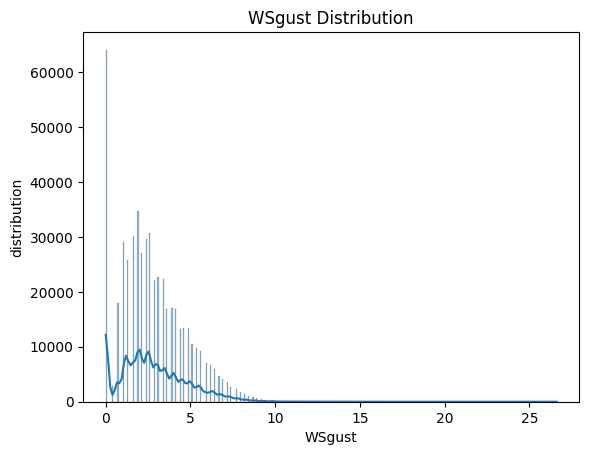

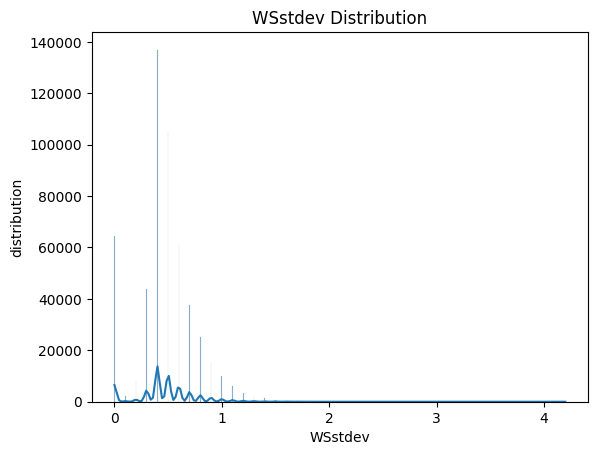

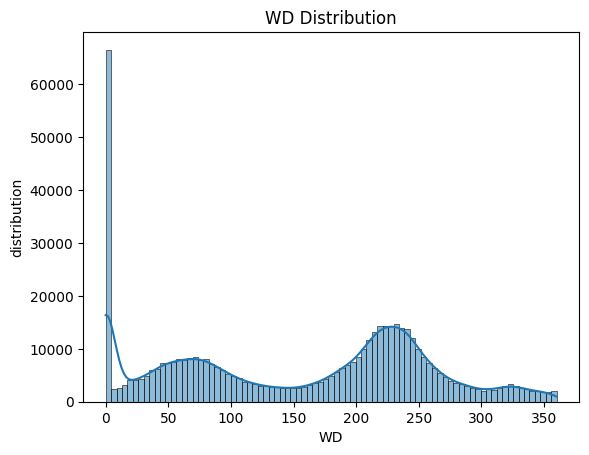

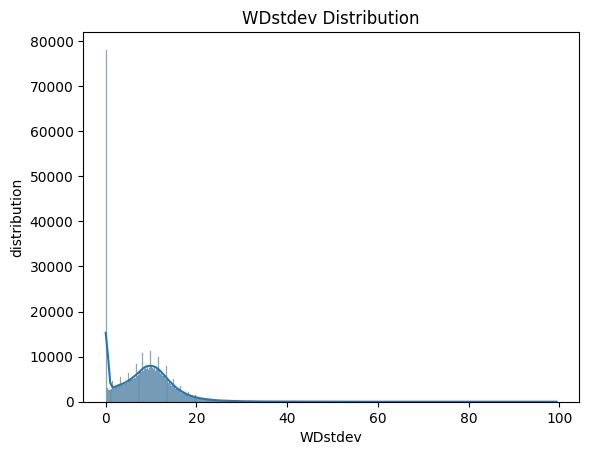

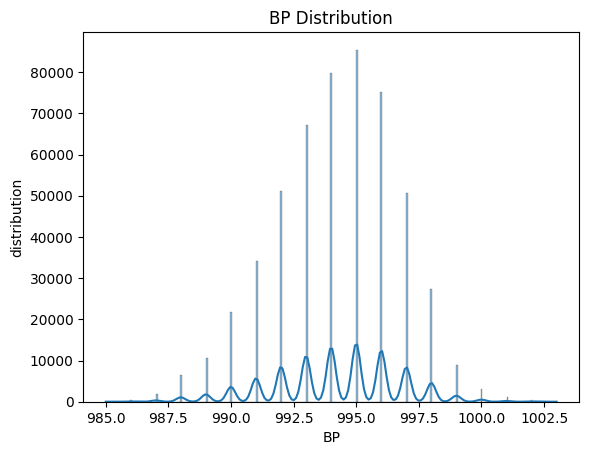

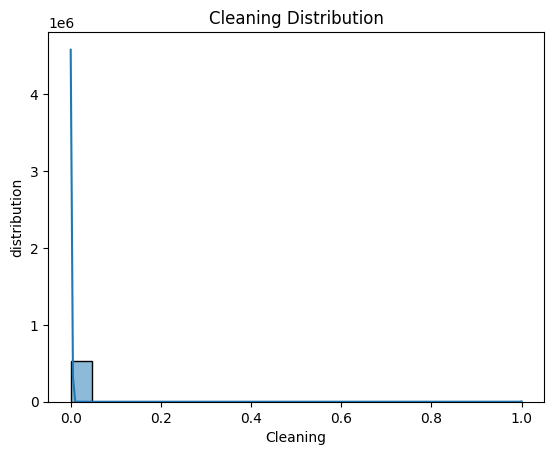

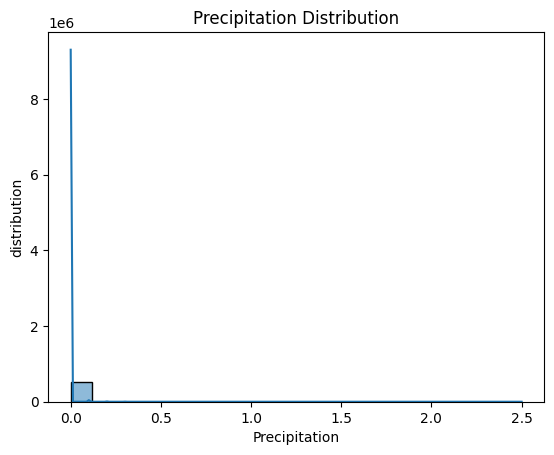

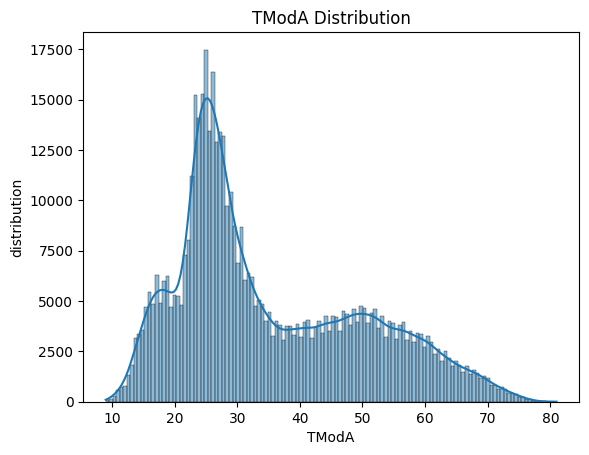

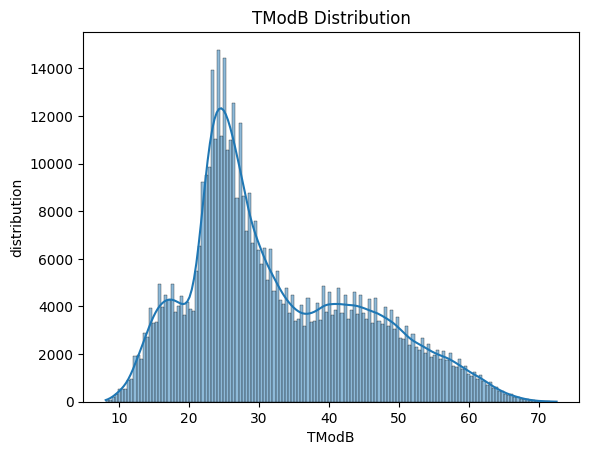

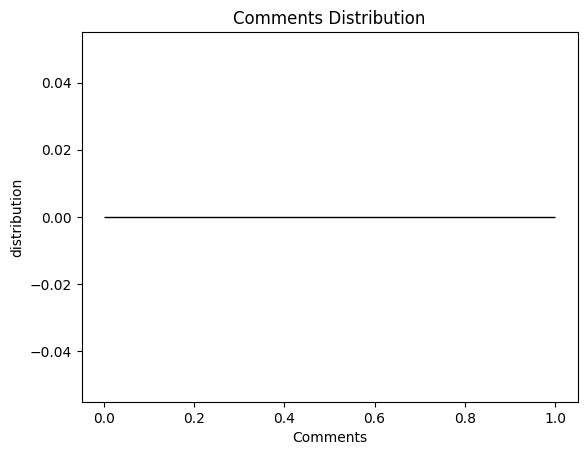

In [47]:
for col in numeric_df:
    sns.histplot(numeric_df[col], kde=True)
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("distribution")
    plt.show()

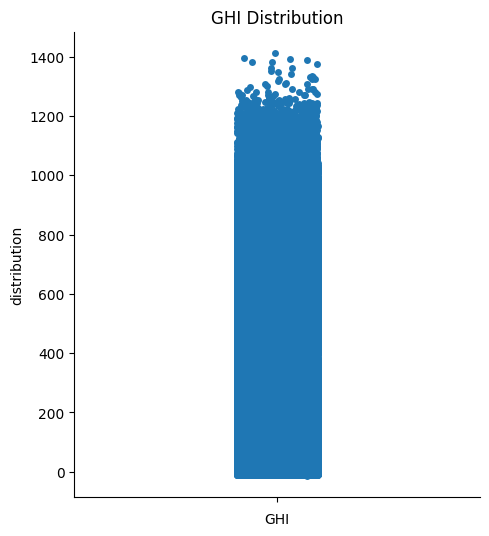

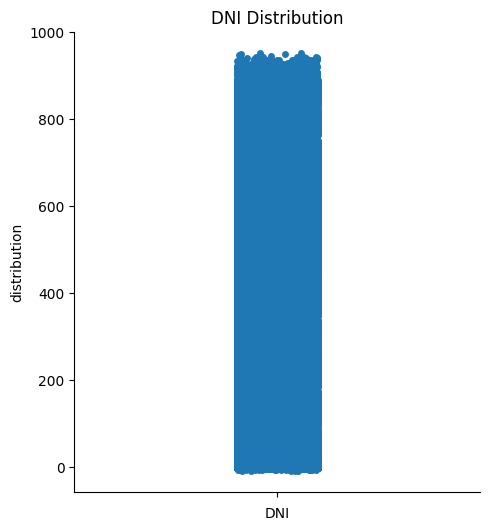

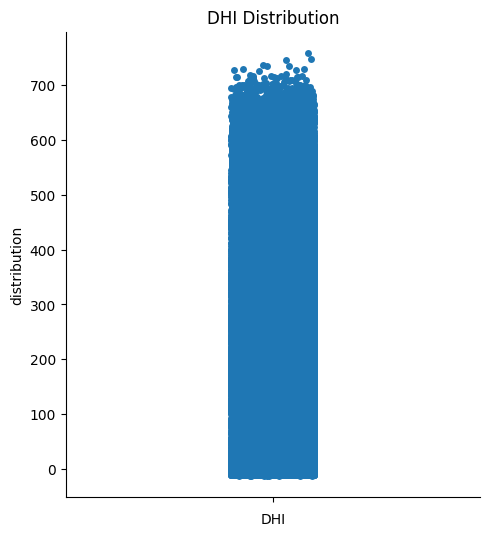

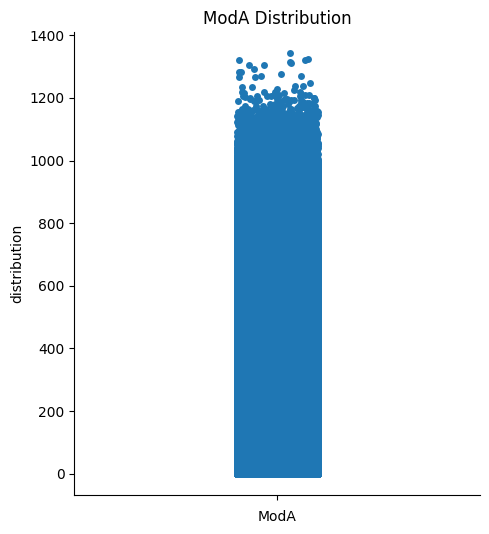

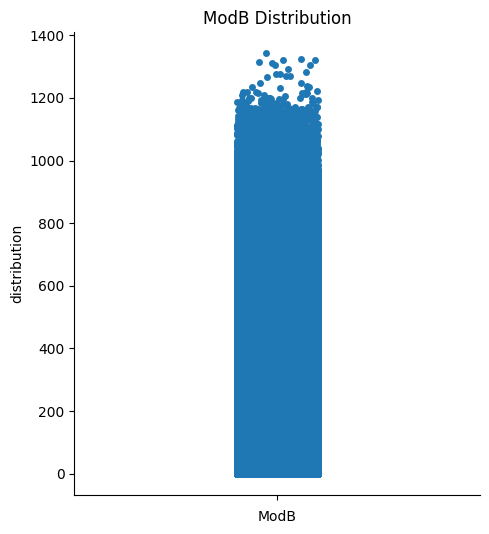

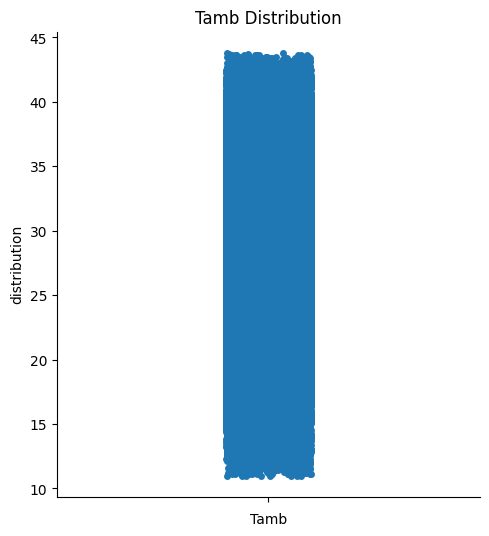

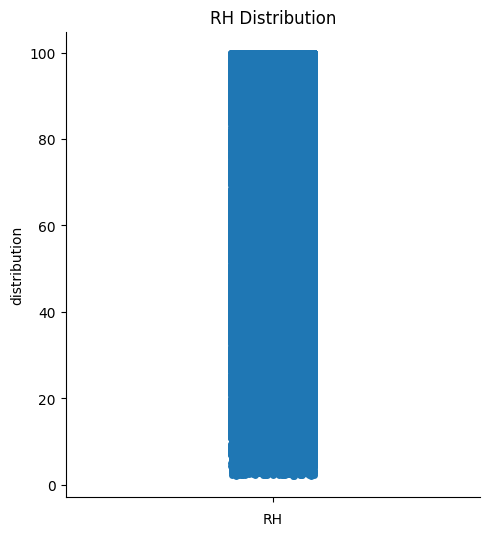

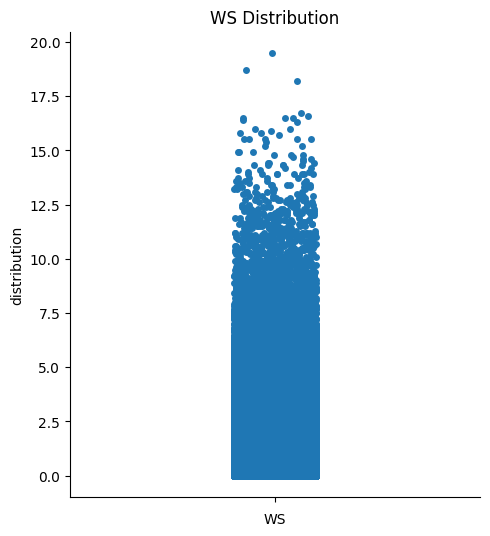

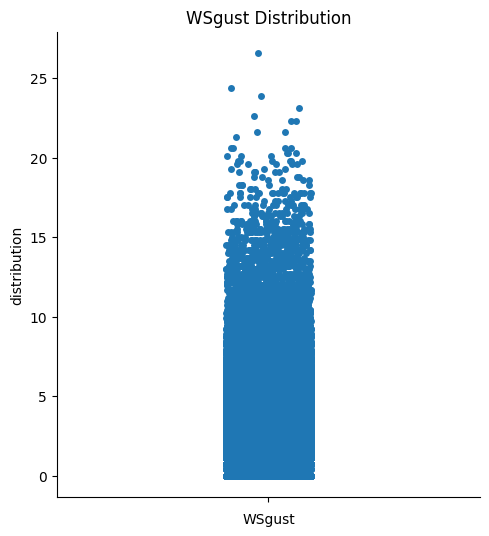

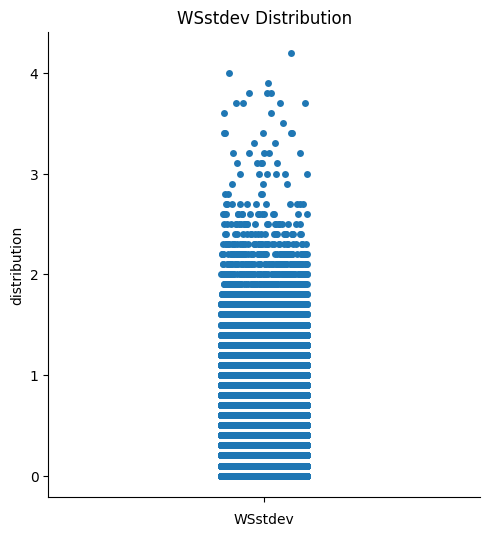

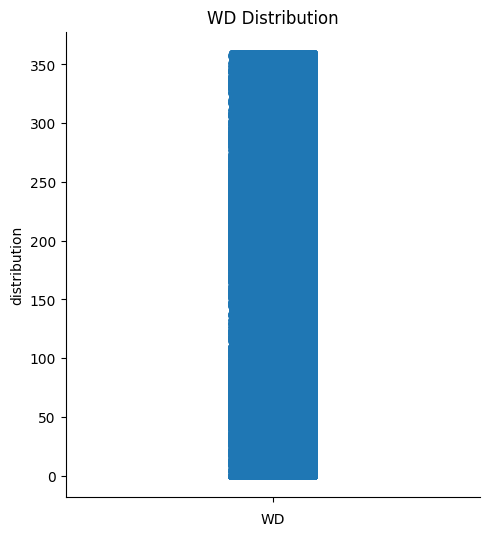

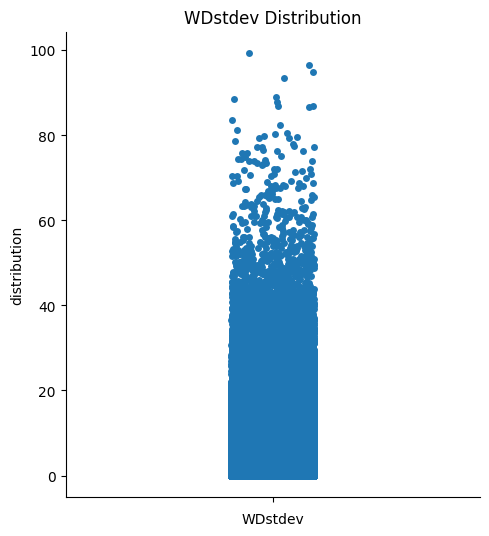

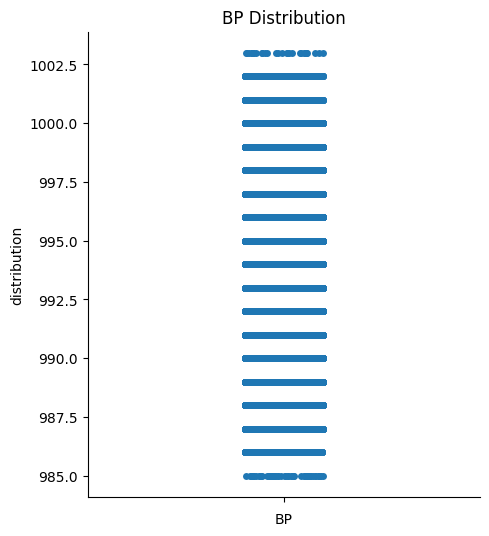

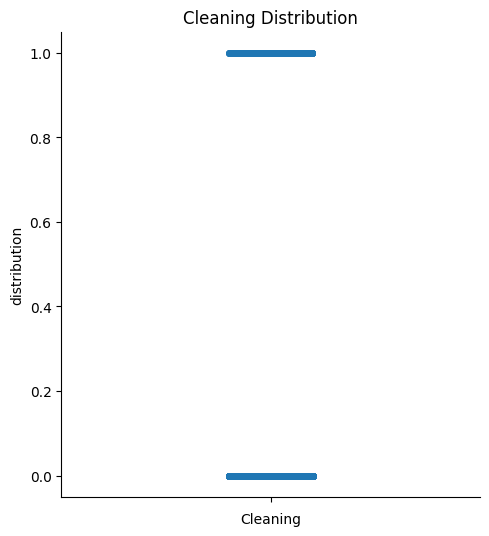

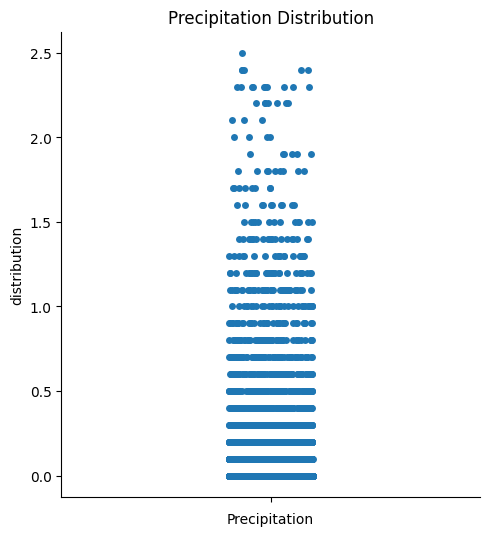

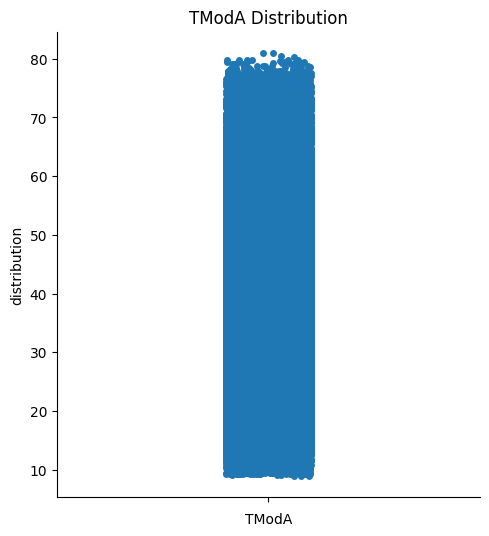

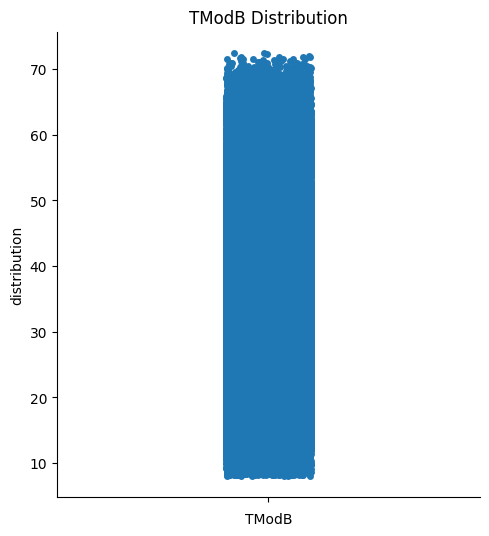

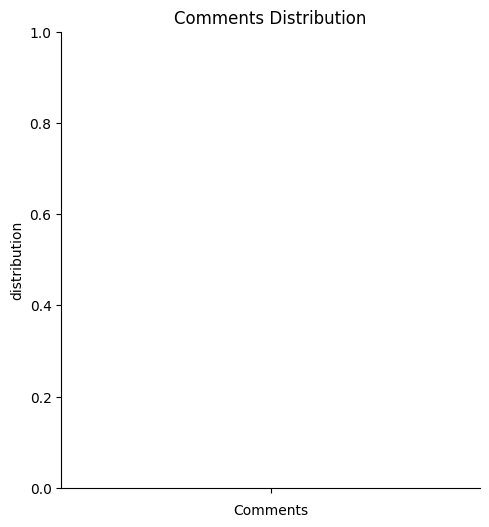

In [52]:
for col in numeric_df:
    sns.catplot(numeric_df[col])
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("distribution")
    plt.show()

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')


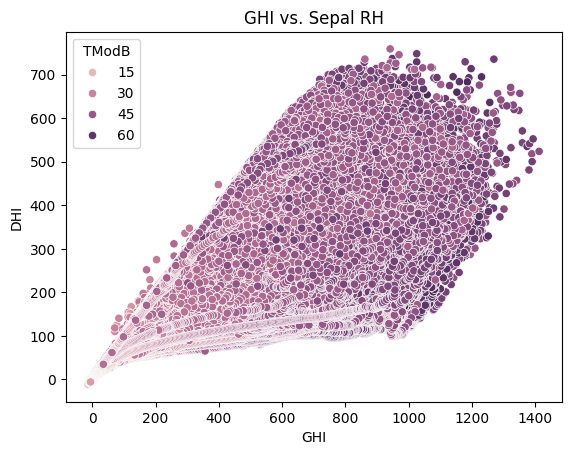

In [60]:
print(ds.columns)
sns.scatterplot(data=ds, x="GHI", y="DHI", hue="TModB")
plt.title("GHI vs. Sepal RH")
plt.show()
